In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
from sklearn import externals
from six import StringIO

In [3]:
fraud=pd.read_csv('/content/creditcard.csv')
#from sklearn import datasets

FileNotFoundError: [Errno 2] No such file or directory: '/content/creditcard.csv'

In [ ]:
fraud

In [ ]:
fraud.info()

In [ ]:
fraud.isnull().sum()

In [ ]:
fraud.describe()

In [ ]:
fraud.head()

In [ ]:
fraud.Amount[fraud['Class']==1.0]

In [ ]:
fraud.corr()

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"]=(30,20)
sns.heatmap(fraud.corr(),annot=True,linewidth=2)

In [ ]:
X = fraud.iloc[:,:-1]
Y = fraud.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
st.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
X_train.shape

In [ ]:
Y_train

In [ ]:
Y_train.value_counts()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,Y_train)

In [ ]:
Y_predict = dc.predict(X_test)
Y_predict

In [ ]:
Y_test.value_counts()

In [ ]:
Y_test

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_predict))

In [ ]:
dc.score(X_train,Y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predict)

In [ ]:
#random
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,Y_train)

In [5]:
Y_rd_predict = rf.predict(X_test)

NameError: name 'rf' is not defined

In [28]:
print(classification_report(Y_test,Y_rd_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85291
           1       0.97      0.74      0.84       152

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [32]:
confusion_matrix(Y_test,Y_rd_predict)

array([[85287,     4],
       [   40,   112]])

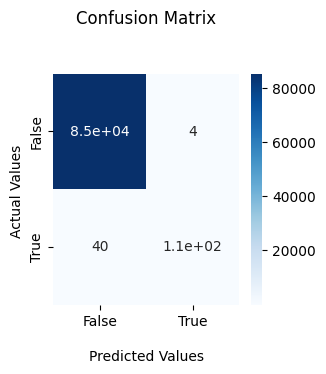

In [39]:
cf_matrix=confusion_matrix(Y_test,Y_rd_predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title("Confusion Matrix\n\n");
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

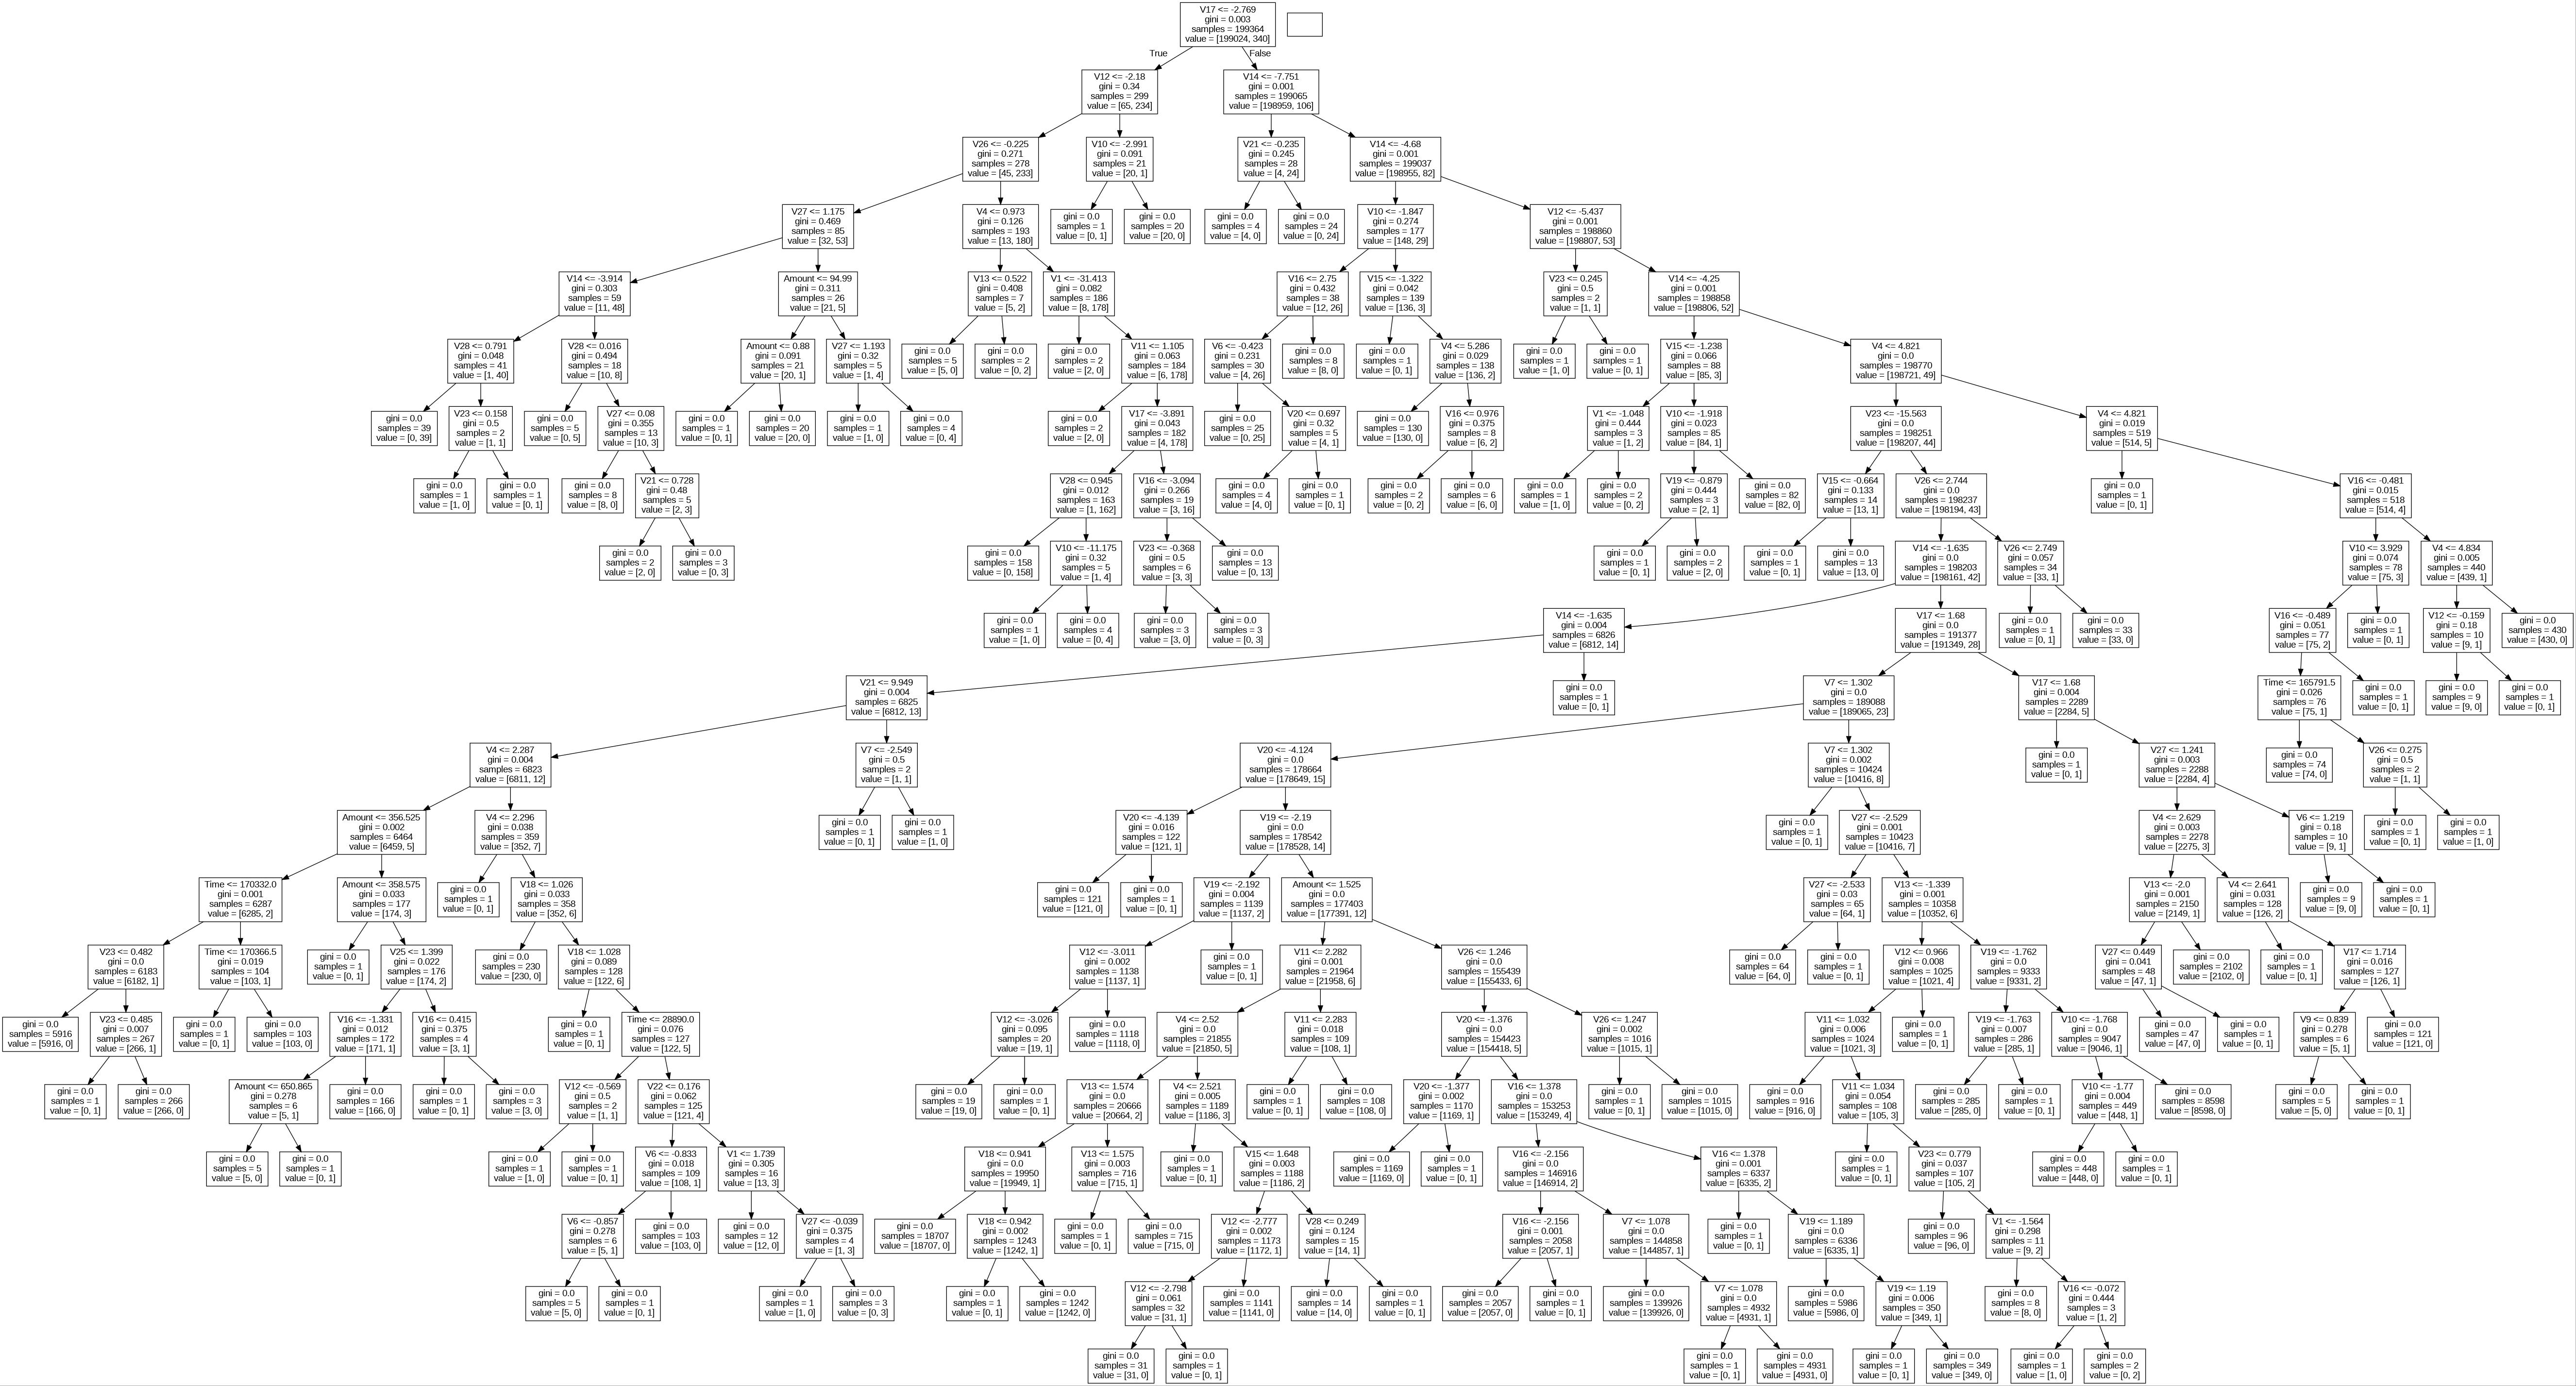

In [ ]:
#pydotplus which is used for printing the decision tree
from sklearn.tree import export_graphviz
import pydotplus
plt.rcParams['figure.figsize']=(50,50)
dot_data = StringIO()
X_data = export_graphviz(dc,out_file=dot_data,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpg())
#export_graphviz()

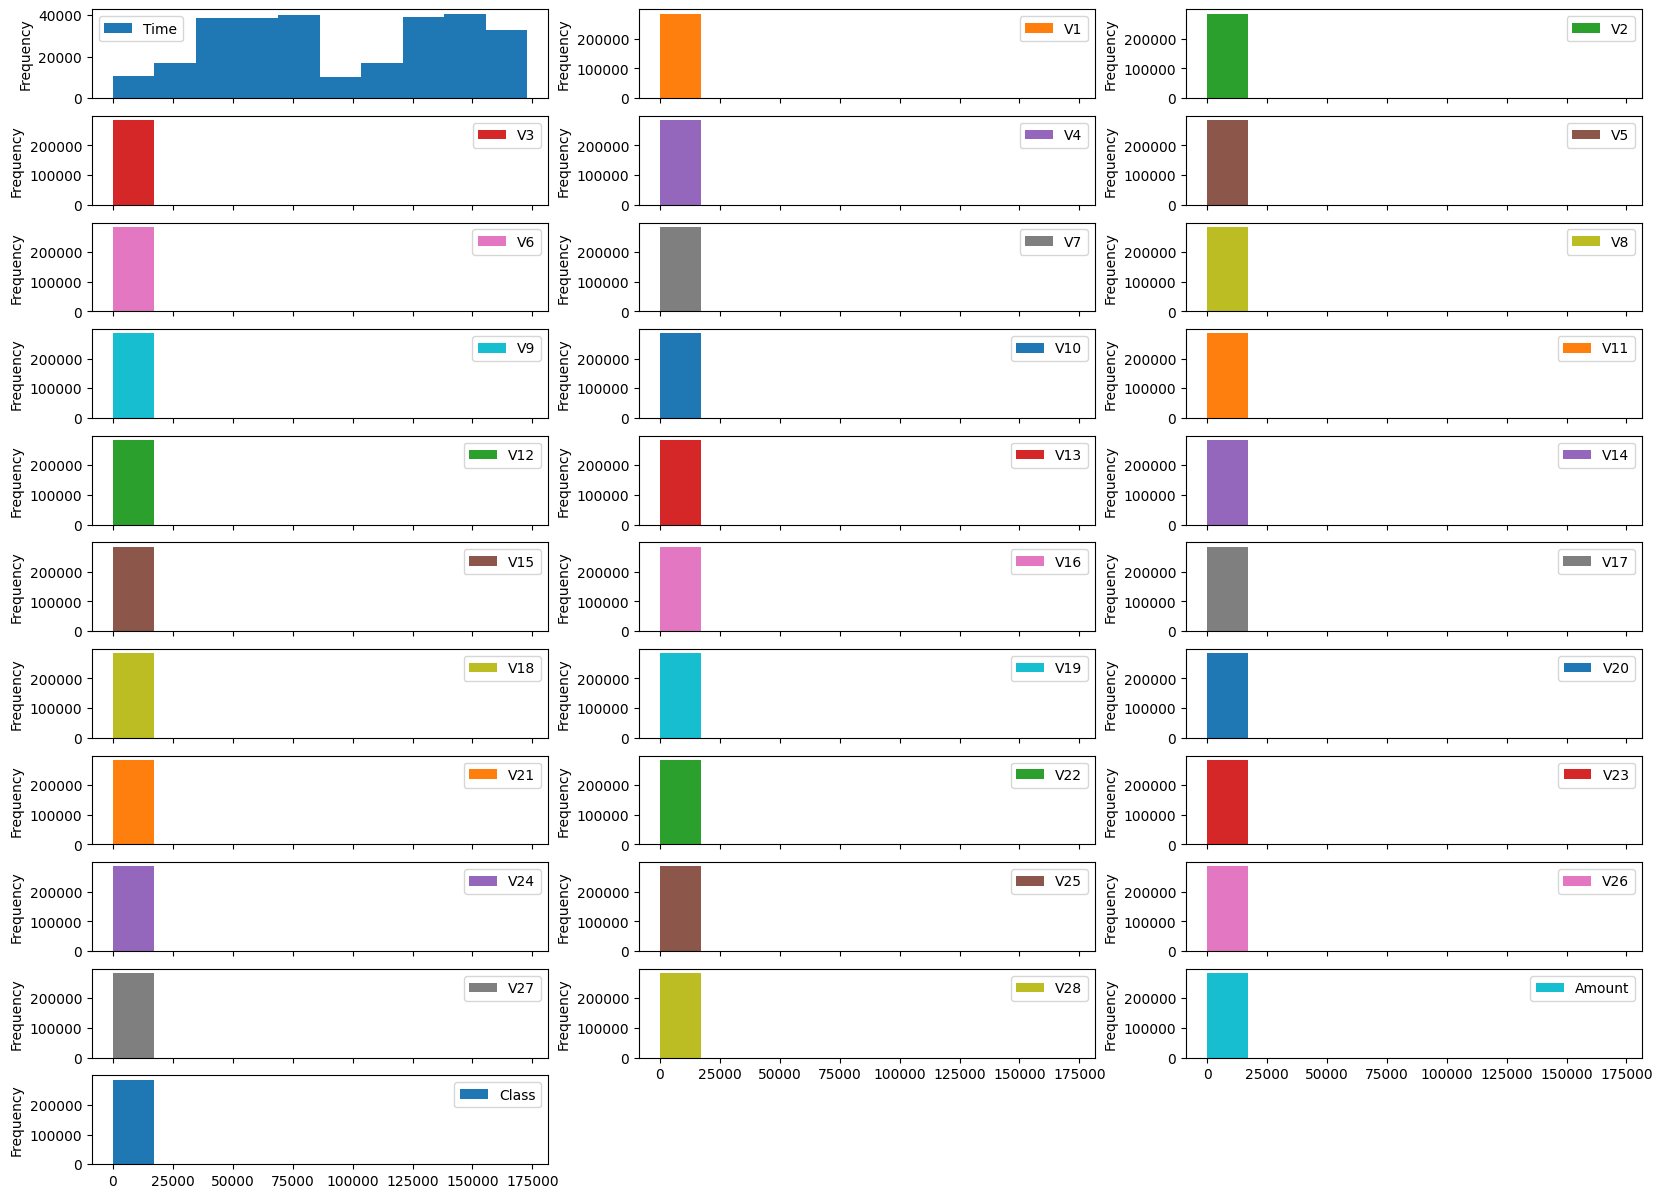

In [ ]:
plt.rcParams["figure.figsize"]=(20,15)
fraud.plot(kind="hist",subplots="True",layout=(11,3))
plt.show()

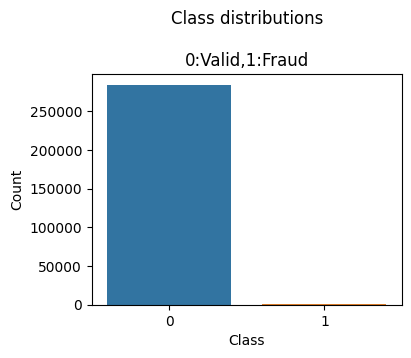

In [58]:

sns.countplot(x='Class',data=fraud);
plt.rcParams["figure.figsize"]=(4,3)
plt.title("Class distributions\n\n0:Valid,1:Fraud");
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()
